In [14]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('csv_files/full_stats.csv')

In [10]:
df.drop('Unnamed: 0', axis=1 ,inplace=True)

In [100]:
df.head()

,NAME,COLLEGE,YEAR,QBR,PAA,PLAYS,EPA,PASS,RUN,QBR_SACK,PEN,RAW,OVERALL,OFFENSE,DEFENSE,SPECIAL,CMP,PATT,CMP%,PYDS,PAVG,PLNG,PTD,INT,TOTAL_SACKS,RTG,RATT,RYDS,RAVG,RLNG,RTD,AGE,DRAFTED,CONFERENCE,STYLE,GRADE
0,Pat White,BIG12,2005.0,87.5,42.1,267.0,44.3,15.9,32.3,-2.9,-1.6,83.8,77.0,76.2,69.4,46.7,65.0,114.0,57.0,828.0,7.3,50.0,8.0,5.0,5.0,132.4,131.0,952.0,7.3,76.0,7.0,19.0,1.0,TOP,Dual-Threat,80-89
1,Vince Young,BIG12,2005.0,86.1,71.5,532.0,75.0,44.5,36.2,-8.1,2.2,80.2,94.8,92.0,85.0,71.9,212.0,325.0,65.2,3036.0,9.3,75.0,26.0,10.0,13.0,163.9,155.0,1050.0,6.8,80.0,12.0,22.0,1.0,TOP,Dual-Threat,80-89
2,Brian Brohm,ACC,2005.0,81.2,48.9,385.0,49.8,56.1,1.7,-9.4,2.0,78.9,76.3,84.0,54.4,55.2,207.0,301.0,68.8,2883.0,9.6,76.0,19.0,5.0,17.0,166.7,NaN,NaN,NaN,NaN,NaN,20.0,1.0,TOP,NaN,80-89
3,Rudy Carpenter,PAC-12,2005.0,80.8,39.5,307.0,42.7,51.6,2.5,-13.1,1.2,79.2,68.1,79.0,48.2,50.1,156.0,228.0,68.4,2273.0,10.0,69.0,17.0,2.0,21.0,175.0,NaN,NaN,NaN,NaN,NaN,19.0,NaN,TOP,NaN,80-89
4,Matt Leinart,PAC-12,2005.0,80.5,51.1,529.0,61.5,64.9,6.5,-8.8,-1.0,73.2,94.1,95.8,78.7,40.7,283.0,431.0,65.7,3815.0,8.9,67.0,28.0,8.0,17.0,157.7,NaN,NaN,NaN,NaN,NaN,22.0,1.0,TOP,NaN,80-89


In [97]:
df.loc[df['QBR'] >=90, 'GRADE'] = '90+'
df.loc[(df['QBR'] >= 80 ) & (df['QBR'] <90), 'GRADE'] = '80-89'
df.loc[(df['QBR'] >= 70 ) & (df['QBR'] <80), 'GRADE'] = '70-79'
df.loc[(df['QBR'] >= 60 ) & (df['QBR'] <70), 'GRADE'] = '60-69'
df.loc[(df['QBR'] >= 50 ) & (df['QBR'] <60), 'GRADE'] = '50-59'
df.loc[df['QBR'] < 50 , 'GRADE'] = '49-'

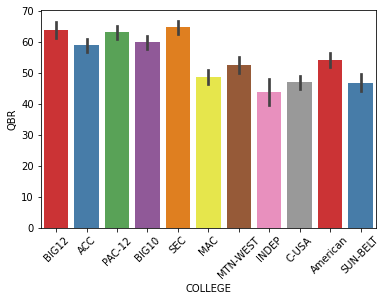

In [102]:
chart = sns.barplot(
    data=df,
    x='COLLEGE',
    y='QBR',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

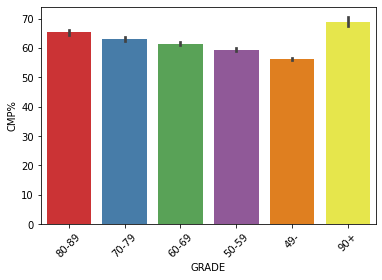

In [151]:
chart = sns.barplot(
    data=df,
    x='GRADE',
    y='CMP%',
    palette='Set1'
)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45);

In [72]:
df.loc[df['COLLEGE'].isin(['BIG12', 'ACC', 'PAC-12', 'BIG10', 'SEC']), 'CONFERENCE'] = 'TOP'
df.loc[df['COLLEGE'].isin(['MAC', 'MTN-WEST', 'INDEP', 'C-USA', 'American', 'SUN-BELT']), 'CONFERENCE'] = 'BOTTOM'

In [81]:
df.loc[df['RAVG'] >= 4, 'STYLE'] = 'Dual-Threat'
df.loc[df['RAVG'] < 4, 'STYLE'] = 'Standard'

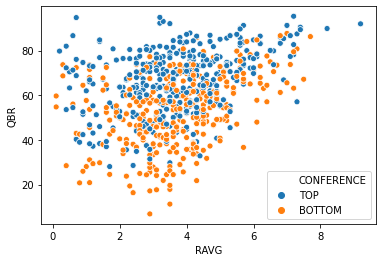

In [106]:
sns.scatterplot(x='RAVG', y='QBR', hue='CONFERENCE', data=df);

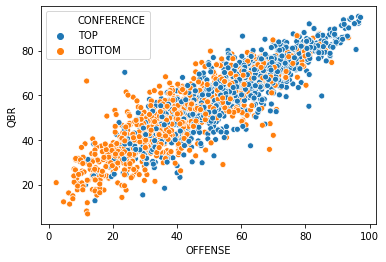

In [92]:
sns.scatterplot(x='OFFENSE', y='QBR', hue='CONFERENCE', data=df)

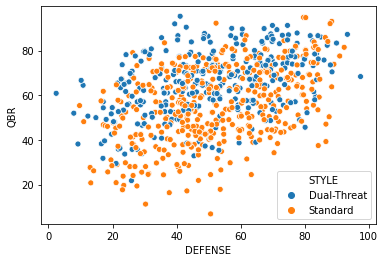

In [111]:
sns.scatterplot(x='DEFENSE', y='QBR', hue='STYLE',  data=df)

In [137]:
len(df[df['AGE'] == 20])

102

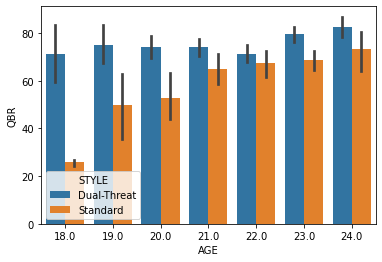

In [146]:
sns.barplot(x='AGE', y='QBR', hue='STYLE', data=df[(df['AGE'] < 25) & (df['AGE'] > 0)])


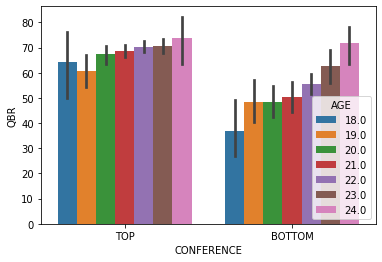

In [150]:
sns.barplot(x='CONFERENCE', y='QBR', hue='AGE', data=df[(df['AGE'] < 25) & (df['AGE'] > 0)])

In [154]:
hdf =df.fillna('0')

In [157]:
sns.heatmap(hdf)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [160]:
hdf.drop(['NAME', 'COLLEGE', 'CONFERENCE', 'STYLE', 'GRADE'], axis=1, inplace=True)

In [161]:
sns.heatmap(hdf)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
hdf